In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls drive/MyDrive/OpenCVTest/testVid.mp4

drive/MyDrive/OpenCVTest/testVid.mp4


In [3]:
import cv2
import numpy as np

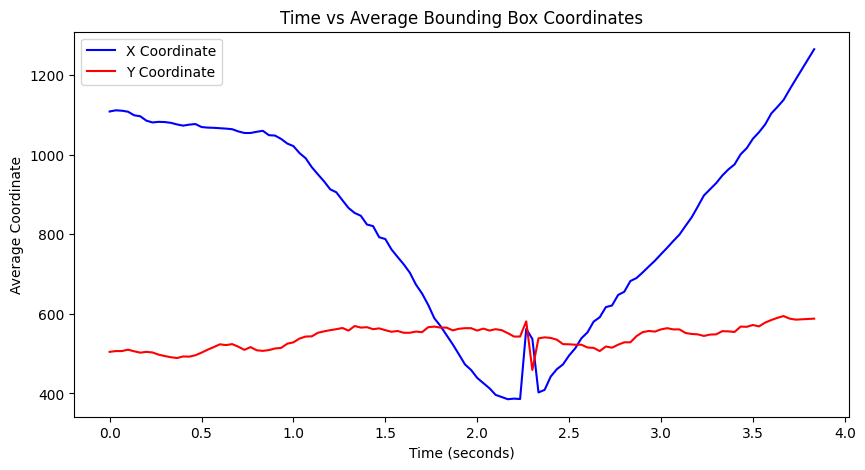

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store time, x, and y coordinates
times = []
x_coords = []
y_coords = []

# Open the video file
cap = cv2.VideoCapture('drive/MyDrive/OpenCVTest/testVid.mp4')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

fps = cap.get(cv2.CAP_PROP_FPS)  # Get the frames per second of the video
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Calculate the average x and y coordinates of the faces detected
    if len(faces) > 0:
        avg_x = np.mean([x+w/2 for x, y, w, h in faces])
        avg_y = np.mean([y+h/2 for x, y, w, h in faces])
        times.append(frame_count/fps)  # Convert frame count to seconds
        x_coords.append(avg_x)
        y_coords.append(avg_y)

    frame_count += 1

cap.release()

# Plotting
plt.figure(figsize=(10, 5))

# Plot time vs x coordinate
plt.plot(times, x_coords, label='X Coordinate', color='blue')

# Plot time vs y coordinate
plt.plot(times, y_coords, label='Y Coordinate', color='red')

plt.xlabel('Time (seconds)')
plt.ylabel('Average Coordinate')
plt.title('Time vs Average Bounding Box Coordinates')
plt.legend()
plt.show()

In [13]:
import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture('drive/MyDrive/OpenCVTest/testVid.mp4')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)  # Get the frames per second of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
mid_x, mid_y = frame_width // 2, frame_height // 2  # Center of the frame

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Calculate the average x coordinate of the faces detected
    if len(faces) > 0:
        avg_x = np.mean([x + w / 2 for x, y, w, h in faces])

        # Adjust camera based on the average x position relative to the frame center
        if avg_x > mid_x * 1.2:  # Move camera to the right if >20% deviation
            while avg_x > mid_x * 1.1:  # Continue until <10% deviation
                ret, frame = cap.read()
                if not ret:
                    break
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    avg_x = np.mean([x + w / 2 for x, y, w, h in faces])
                else:
                    break  # Break if no faces are detected to avoid infinite loop

        elif avg_x < mid_x * 0.8:  # Move camera to the left if >20% deviation
            while avg_x < mid_x * 1.1:  # Continue until <10% deviation
                ret, frame = cap.read()
                if not ret:
                    break
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    avg_x = np.mean([x + w / 2 for x, y, w, h in faces])
                else:
                    break  # Break if no faces are detected to avoid infinite loop

cap.release()